# 📊 Análise Smart Office
Este notebook realiza a análise do projeto *Smart Office*, utilizando métricas de desempenho (KPIs), dados de progresso e dados de IoT.

## 🧩 Fase 1 – Definição de KPIs e Análise Inicial

In [1]:
# KPIs escolhidos:
# 1. CPI (Cost Performance Index): mede o custo em relação ao planejado.
# 2. SPI (Schedule Performance Index): mede o avanço em relação ao planejado.
# 3. Redução percentual no consumo de energia (Produto).

import pandas as pd

# Carregar datasets
project_df = pd.read_csv("project_progress.csv")
iot_df = pd.read_csv("smart_office_data.csv")

# Visualização inicial dos dados
print("=== PROGRESSO DO PROJETO ===")
display(project_df.head())
print(project_df.info())
print(project_df.describe())

print("\n=== DADOS DE IoT ===")
display(iot_df.head())
print(iot_df.info())
print(iot_df.describe())


=== PROGRESSO DO PROJETO ===


,task_id,task_name,sprint,planned_hours,actual_hours,status,completion_date
0,1,Seleção de Fornecedores,1,20,25,Done,2025-08-08
1,2,Instalação Sensores Ocupação,1,40,38,Done,2025-08-12
2,3,Instalação Sensores Luz,2,30,35,Done,2025-08-20
3,4,Desenvolvimento Backend,2,50,0,In Progress,NaN
4,5,Desenvolvimento Dashboard,3,60,0,To Do,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   task_id          6 non-null      int64 
 1   task_name        6 non-null      object
 2   sprint           6 non-null      int64 
 3   planned_hours    6 non-null      int64 
 4   actual_hours     6 non-null      int64 
 5   status           6 non-null      object
 6   completion_date  3 non-null      object
dtypes: int64(4), object(3)
memory usage: 468.0+ bytes
None
        task_id    sprint  planned_hours  actual_hours
count  6.000000  6.000000       6.000000      6.000000
mean   3.500000  2.000000      40.000000     16.333333
std    1.870829  0.894427      14.142136     18.402898
min    1.000000  1.000000      20.000000      0.000000
25%    2.250000  1.250000      32.500000      0.000000
50%    3.500000  2.000000      40.000000     12.500000
75%    4.750000  2.750000      47.500000     32.50

,timestamp,temperature,luminosity,occupancy
0,2025-08-01 08:00,24.5,300,10
1,2025-08-01 09:00,25.1,320,12
2,2025-08-01 10:00,25.3,350,14
3,2025-08-01 11:00,26.0,370,15
4,2025-08-01 12:00,26.5,400,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    18 non-null     object 
 1   temperature  18 non-null     float64
 2   luminosity   18 non-null     int64  
 3   occupancy    18 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 708.0+ bytes
None
       temperature  luminosity  occupancy
count    18.000000   18.000000  18.000000
mean     24.344444  290.277778  10.722222
std       1.021085   55.953558   2.696524
min      23.000000  210.000000   7.000000
25%      23.525000  245.000000   9.000000
50%      24.000000  285.000000  10.000000
75%      25.075000  327.500000  12.750000
max      26.500000  400.000000  16.000000


## 📊 Fase 2 – Visualização do Progresso do Projeto

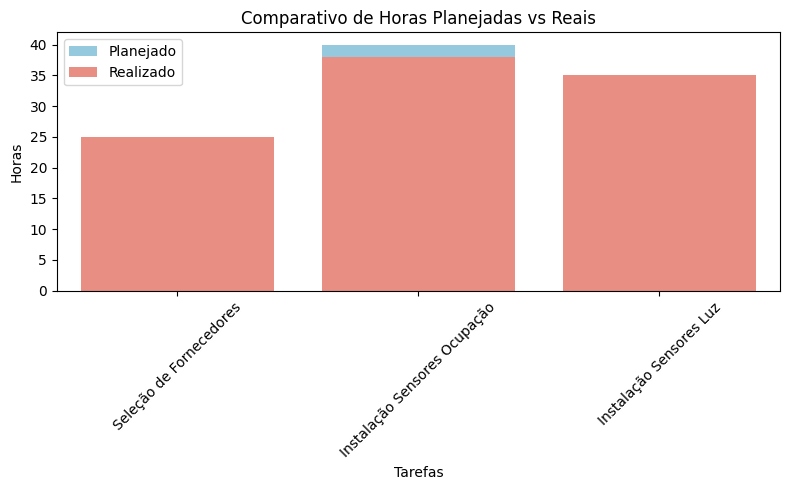

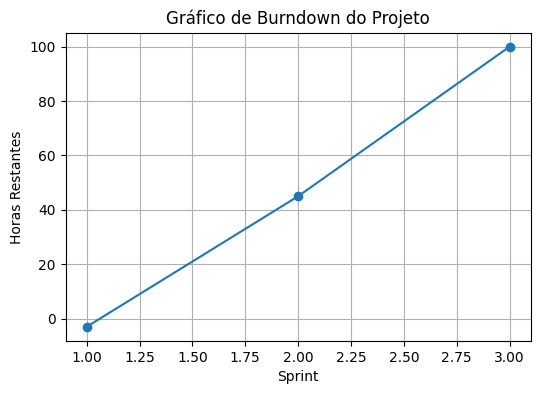

📘 O gráfico de Burndown mostra a redução do trabalho restante por sprint. Se a linha não cair de forma consistente, o projeto pode estar atrasado.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar tarefas concluídas
done_tasks = project_df[project_df["status"] == "Done"]

# Gráfico de horas planejadas vs reais
plt.figure(figsize=(8,5))
sns.barplot(data=done_tasks, x="task_name", y="planned_hours", color="skyblue", label="Planejado")
sns.barplot(data=done_tasks, x="task_name", y="actual_hours", color="salmon", label="Realizado")
plt.title("Comparativo de Horas Planejadas vs Reais")
plt.xlabel("Tarefas")
plt.ylabel("Horas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de Burndown
burndown = project_df.groupby("sprint")[["planned_hours", "actual_hours"]].sum()
burndown["horas_restantes"] = burndown["planned_hours"] - burndown["actual_hours"].fillna(0)

plt.figure(figsize=(6,4))
plt.plot(burndown.index, burndown["horas_restantes"], marker="o")
plt.title("Gráfico de Burndown do Projeto")
plt.xlabel("Sprint")
plt.ylabel("Horas Restantes")
plt.grid(True)
plt.show()

print("📘 O gráfico de Burndown mostra a redução do trabalho restante por sprint. Se a linha não cair de forma consistente, o projeto pode estar atrasado.")


## 🔎 Fase 3 – Análise dos Dados de IoT

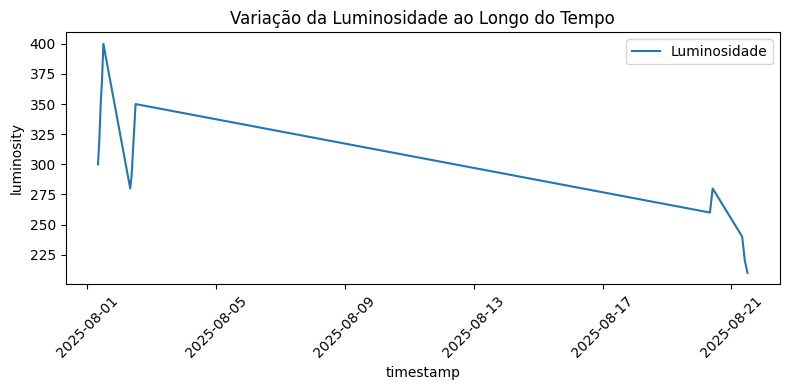

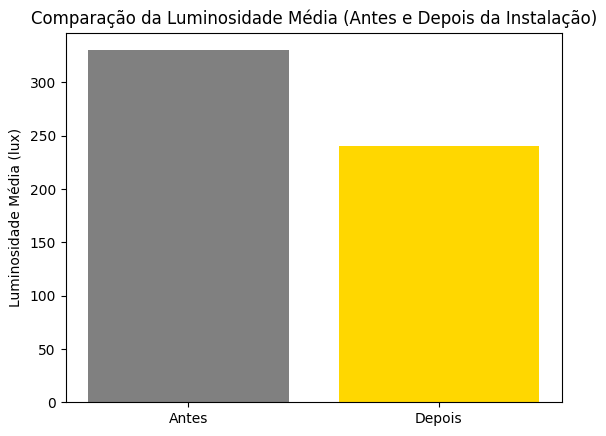

Média Antes: 330.00
Média Depois: 240.62


In [3]:
# Converter coluna de data
iot_df["timestamp"] = pd.to_datetime(iot_df["timestamp"])

# Gráfico de luminosidade
plt.figure(figsize=(8,4))
sns.lineplot(data=iot_df, x="timestamp", y="luminosity", label="Luminosidade")
plt.title("Variação da Luminosidade ao Longo do Tempo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cruzamento de dados antes/depois da instalação
install_date = pd.to_datetime("2025-08-20")
antes = iot_df[iot_df["timestamp"] < install_date]["luminosity"].mean()
depois = iot_df[iot_df["timestamp"] >= install_date]["luminosity"].mean()

plt.bar(["Antes", "Depois"], [antes, depois], color=["gray", "gold"])
plt.title("Comparação da Luminosidade Média (Antes e Depois da Instalação)")
plt.ylabel("Luminosidade Média (lux)")
plt.show()

print(f"Média Antes: {antes:.2f}")
print(f"Média Depois: {depois:.2f}")


## 🧠 Fase 4 – Conclusões e Tomada de Decisão

**Progresso do Projeto:**  
A tarefa *Seleção de Fornecedores* ultrapassou as horas planejadas. O gráfico de Burndown mostra que o esforço nas sprints 2 e 3 é alto, indicando risco de atraso.

**Resultados do Produto:**  
A luminosidade média reduziu após a instalação dos sensores de luz, indicando melhora no controle de energia.

**Decisão:**  
Revisar o planejamento de horas para *Desenvolvimento Backend* e acelerar a instalação dos sensores de temperatura.